# Easier navigation:

------------------------------------

## 1. <a href='#setup'>Setup</a>
------------------------------------
## 2. <a href='#rnd'>*Random Graph Stuff*</a>
## 3. <a href='#cen'>Centrality</a>
## 4. <a href='#nde'>Node Lookup & Centrality Ranking</a>
## 5. <a href='#bokeh'>Intro Bokeh</a>
## 6. <a href='#att'>*Node Attributes (Bokeh)*</a>
## 7. <a href='#stellar'>*Node2Vec (Stellar)*</a>
## 9. <a href='#DiGraph'>Creating DiGraph w/ HITS node attribute</a>
## 10. <a href='#cliq'>Cliques</a> 
## 11. <a href='#kmc'>K-Means Clustering</a>
## 12. <a href='#nkc'>Node2Vec with K-Means Clustering</a>
## 13. <a href='#bok'>Example: Bokeh to HTML</a>
## 14. <a href='#gexf'>NetworkX to gexf (Gephi)</a>


---


## 15. <a href='#save'>Save ipynb as HTML/PDF</a>
-------------------------------------
-------------------------------------

IMPORTANT: This is the folder that you will be saving various graphs and visualizations into. `save_folder` should be set to the path of this folder.

In [1]:
save_folder = "/content/drive/My Drive/AWCA/Colab_notebooks/edge_list_creation/[NetworkX] BERT2Net/Doc2vec2net copy outputs"

#example: "/content/drive/My Drive/AWCA/Colab_notebooks/edge_list_creation"

<a name='setup'></a>
# 1. Setup

In [2]:
!pip install stellargraph

     |████████████████████████████████| 440kB 2.1MB/s 


There may be errors when running the following cell. Like with `!pip install stellargraph` in the previous cell, you might need to add `!pip install [library]` for any imports that error.

In [3]:
import networkx as nx
import networkx.algorithms.community as nxcom

from sklearn.manifold import TSNE
from stellargraph import StellarGraph
from stellargraph.data import BiasedRandomWalk
from gensim.models import Word2Vec

import matplotlib.pyplot as plt
from matplotlib import pylab
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
%matplotlib inline
from IPython.display import display, clear_output
import numpy as np
import pandas as pd
import pickle
import csv
from google.colab import files

Mounting to load a CSV from a file path in drive.

In [4]:
from google.colab import auth
auth.authenticate_user()

from googleapiclient.discovery import build
service = build('drive', 'v3')

In [5]:
# Run this to mount the Notebook in your Google Drive account 
from google.colab import drive
#drive.mount('/content/drive')
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


We need to specify a path for the CSV file we want to use as our edge list, or input graph, such as `"/content/drive/My Drive/AWCA/.....file.csv"`


In [8]:
path = "/content/drive/My Drive/AWCA/Colab_notebooks/edge_list_creation/Doc2Vec2Net/Doc2Vec_edge_list.csv"

In [9]:
df = pd.read_csv(path)
df["Similarity"]

0       0.909456
1       0.906704
2       0.921105
3       0.903310
4       0.901022
          ...   
1094    0.953381
1095    0.950107
1096    0.923967
1097    0.951878
1098    0.937208
Name: Similarity, Length: 1099, dtype: float64

Convert to NetworkX graph. Here, G is an undirected graph and D is a directed graph.

In [11]:
file = open(path, "r")
next(file)  # skip the first line in the input file
df = pd.read_csv(path)
D = nx.convert_matrix.from_pandas_edgelist(df,'Source','Target',['Similarity'],nx.DiGraph)
G = nx.DiGraph.to_undirected(D)

In [12]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 769\nNumber of edges: 1099\nAverage degree:   2.8583'

<a name='rnd'></a>
## 2. Random graph stuff


Copied from website

In [13]:
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

In [14]:
pos = nx.spring_layout(G, seed=675)

Some basic visualizations

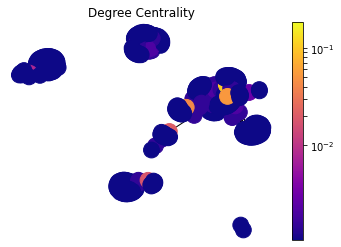

In [15]:
draw(G, pos, nx.degree_centrality(G), 'Degree Centrality')

Apparently saving a graph is the best option for a large number of nodes..

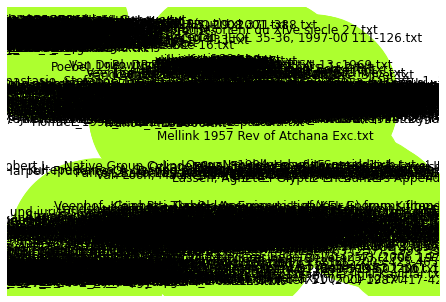

In [16]:
nx.draw(G, with_labels=True, node_color='#ADFF2F', node_size=20000, alpha=1)
plt.savefig("graph.png", dpi=1000)
plt.savefig("graph.pdf")

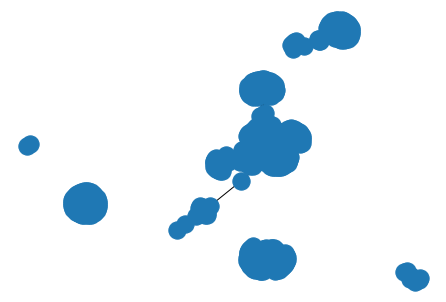

In [17]:
nx.draw(G)

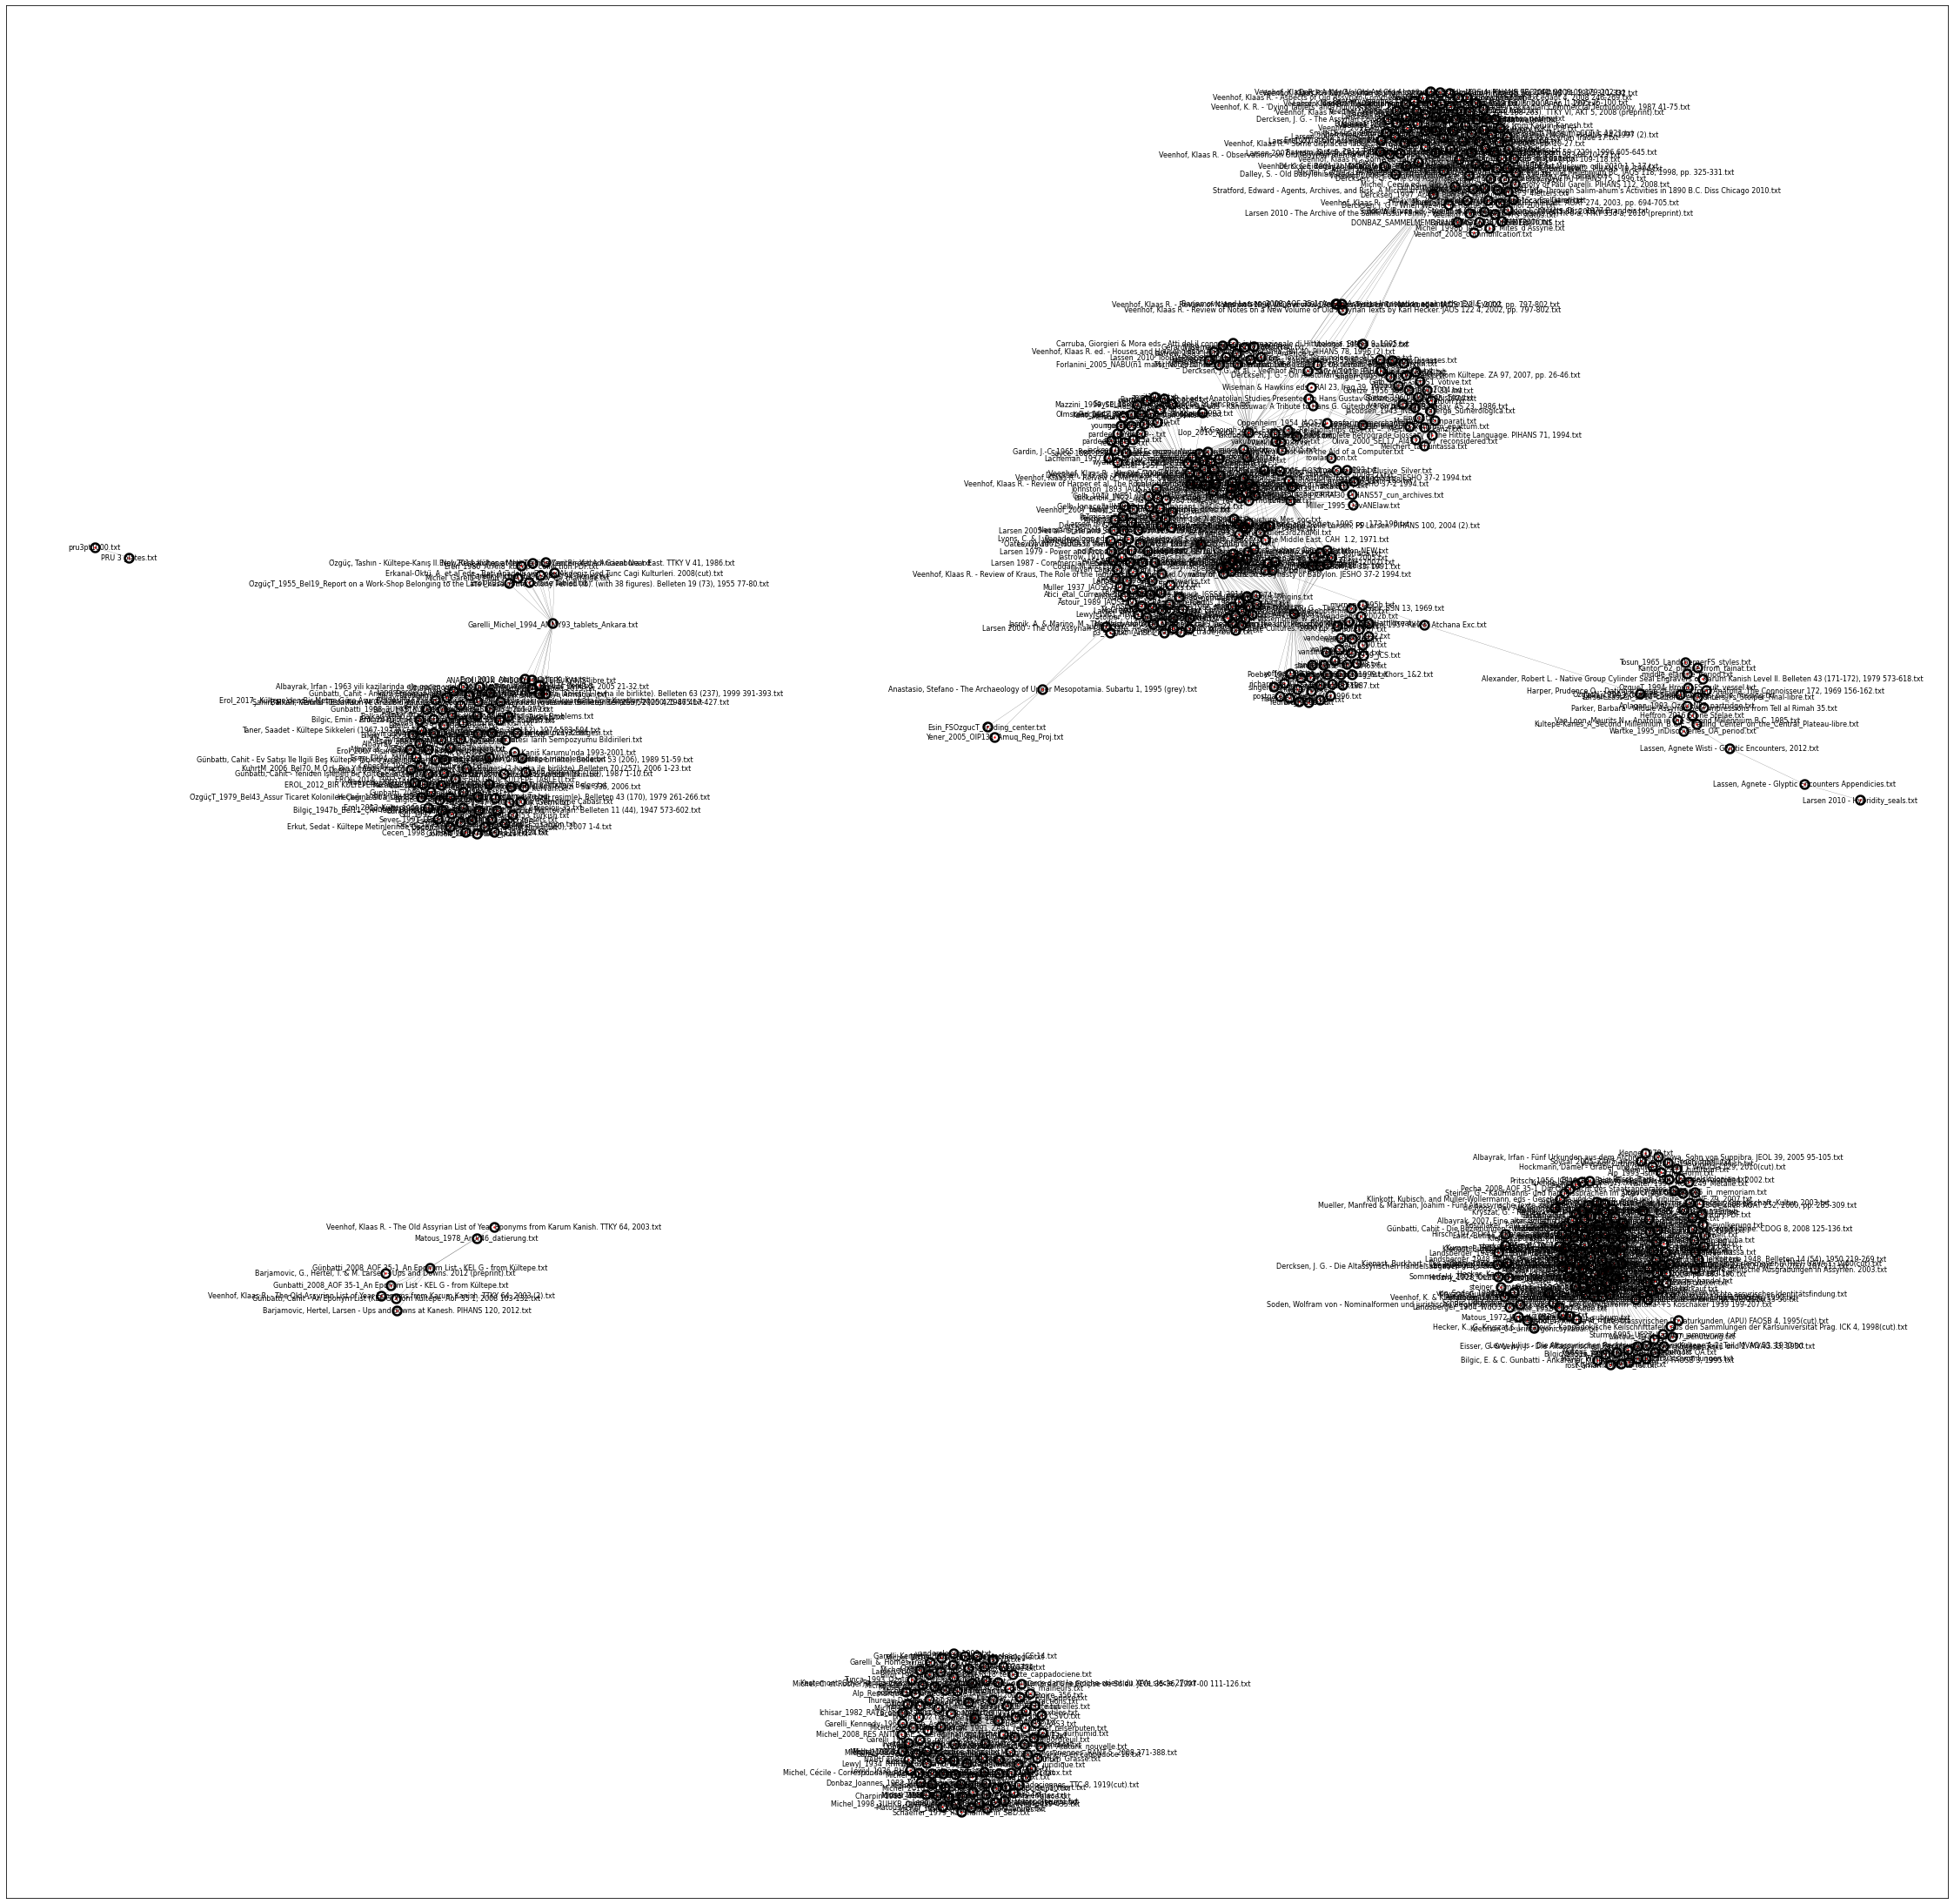

In [18]:
options = {
    "font_size": 8,
    "node_size": 6,
    "node_color": "red",
    "edgecolors": "black",
    "linewidths": 10,
    "width": 0.15,
}

plt.figure(3,figsize=(40,40)) 
nx.draw_networkx(G, **options)
#plt.show()

Saves successfully in drive but looks pretty clumped

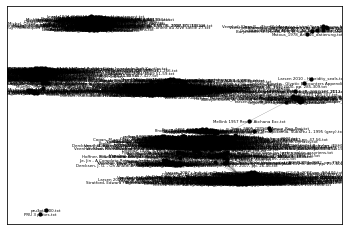

In [19]:
pos=nx.spring_layout(G)   #G is my graph
options = {
    "font_size": 4,
    "node_size": 5,
    "node_color": "red",
    "edgecolors": "black",
    "linewidths": 2,
    "width": 0.15,
}
nx.draw_networkx(G,pos,**options)

images_dir = save_folder
plt.savefig(f"{images_dir}/test_graph.png", dpi=2000)

# Can download instead
#files.download(file_name) 



Without the pdf names

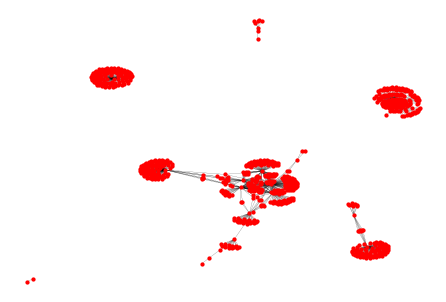

In [20]:
pos=nx.spring_layout(G)   #G is my graph
options = {
    "font_size": 4,
    "node_size": 5,
    "node_color": "blue",
    "edgecolors": "red",
    "linewidths": 2,
    "width": 0.15,
}
nx.draw(G,pos,**options)

images_dir = save_folder
plt.savefig(f"{images_dir}/test_graph_noname.png", dpi=1000)

# Can download instead
#files.download(file_name) 

Saving as a PDF instead of PNG - "This is the best option, as the final graph is not rasterized. In theory, you should be able to zoom in indefinitely." ??

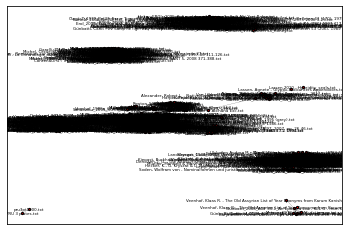

In [21]:
pos=nx.spring_layout(G)   #G is my graph
options = {
    "font_size": 4,
    "node_size": 5,
    "node_color": "red",
    "edgecolors": "black",
    "linewidths": 1,
    "width": 0.15,
}
nx.draw_networkx(G,pos, **options)

images_dir = save_folder
plt.savefig(f"{images_dir}/test_graph.pdf")

# Can download instead
#files.download(file_name) 


<a name='cen'></a>
# 3. Centrality 

Degree centrality

In [22]:
degree_centrality = nx.degree_centrality(G)
count = 0

print(degree_centrality)

{'Llop_2010_AuOr_28_Rec._OBO_160_5.txt': 0.08072916666666666, 'Goetze_1937_JAOS57_Subartu.txt': 0.18229166666666666, 'Carruba, Giorgieri & Mora eds - Atti del il congresson internazionale di Hittitologia. StMed 9, 1995.txt': 0.0013020833333333333, 'Dercksen, J.G. et al. - Veenhof Anniversary Volume. PIHANS 89, 2001.txt': 0.00390625, 'Veenhof, Klaas R. - Review of Notes on a New Volume of Old Assyrian Texts by Karl Hecker. JAOS 122 4, 2002, pp. 797-802.txt': 0.0026041666666666665, 'zaccagnini1999.txt': 0.00390625, 'Larsen 1989.txt': 0.005208333333333333, 'vandemeiroop1999b.txt': 0.005208333333333333, 'Lassen_2010_Tools__Procedures_and_Professions_Textile_Terminologies_ATS_8-libre.txt': 0.0013020833333333333, 'Melchert_aspect1.txt': 0.0013020833333333333, 'Rigg_1937_JAOS57_Armanum_Urartu.txt': 0.005208333333333333, 'Wiseman & Hawkins eds - RAI 23, Iraq 39, 1977.txt': 0.005208333333333333, 'Johnson_2006_RBL_Rev_Haselbach_Sarg_Akk.txt': 0.00390625, 'Hallo_1977_HUCA48_new_moons_sabbaths.txt

#### When I created G as a digraph (directed graph) eigencentrality failed and katz centrality worked. Now as an undirected graph the opposite occurs.

In [23]:
eigenvector = nx.eigenvector_centrality(G)
print(eigenvector)

{'Llop_2010_AuOr_28_Rec._OBO_160_5.txt': 6.264721970501526e-05, 'Goetze_1937_JAOS57_Subartu.txt': 0.00013245144844590013, 'Carruba, Giorgieri & Mora eds - Atti del il congresson internazionale di Hittitologia. StMed 9, 1995.txt': 4.370329143524065e-06, 'Dercksen, J.G. et al. - Veenhof Anniversary Volume. PIHANS 89, 2001.txt': 1.4296735360824745e-05, 'Veenhof, Klaas R. - Review of Notes on a New Volume of Old Assyrian Texts by Karl Hecker. JAOS 122 4, 2002, pp. 797-802.txt': 5.0566913525918365e-06, 'zaccagnini1999.txt': 1.5720323707825954e-05, 'Larsen 1989.txt': 2.0139136642561762e-05, 'vandemeiroop1999b.txt': 1.935267499262392e-05, 'Lassen_2010_Tools__Procedures_and_Professions_Textile_Terminologies_ATS_8-libre.txt': 4.370329143524065e-06, 'Melchert_aspect1.txt': 4.370329143524065e-06, 'Rigg_1937_JAOS57_Armanum_Urartu.txt': 2.1661537371290747e-05, 'Wiseman & Hawkins eds - RAI 23, Iraq 39, 1977.txt': 1.6406685916893723e-05, 'Johnson_2006_RBL_Rev_Haselbach_Sarg_Akk.txt': 1.80291860864927

Katz Centrality bad

In [24]:
#katz_centrality = nx.katz_centrality(G)


### 3.1 Centrality Measures

In [25]:
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
hub, authority = nx.hits(G, max_iter=600)
eigenvector_centrality = nx.eigenvector_centrality(G)

Print the first 5 highest scoring nodes for each of the centrality measure. In each of these measures we see more or less the same names popping up, but not in the same order.

In [26]:
centrality = [degree_centrality, closeness_centrality, betweenness_centrality, hub, authority, eigenvector_centrality]
centrality_labels = ["degree centrality", "closeness centrality",
                     "betweenness centrality", "hub", "authority", "eigenvector centrality"]
for idx, m in enumerate(centrality):
    s = sorted(m, key=m.get, reverse=True)[:5]
    print(f"{centrality_labels[idx]}: {s}")

degree centrality: ['Goetze_1937_JAOS57_Subartu.txt', 'Günbatti, Cahit - Die Beziehungen zwischen assyrischen Kaufleuten und anatolischen Fürsten aus Kültepe. CDOG 8, 2008 125-136.txt', "Hecker_1978b_OrNS47_tib'imma.txt", 'pardee1979-80a.txt', 'Dercksen_1997_ArAn3_BilgicFS_ikribu.txt']
closeness centrality: ['Goetze_1937_JAOS57_Subartu.txt', 'Oppenheim_1954_JAOS74_seafaring_merchants.txt', 'Llop_2010_AuOr_28_Rec._OBO_160_5.txt', 'Wiseman & Hawkins eds - RAI 23, Iraq 39, 1977.txt', 'Dercksen, J.G. et al. - Veenhof Anniversary Volume. PIHANS 89, 2001.txt']
betweenness centrality: ['Goetze_1937_JAOS57_Subartu.txt', 'Dercksen_1997_ArAn3_BilgicFS_ikribu.txt', 'kuhrt1988.txt', 'pardee2001b.txt', 'Llop_2010_AuOr_28_Rec._OBO_160_5.txt']
hub: ['Günbatti, Cahit - Die Beziehungen zwischen assyrischen Kaufleuten und anatolischen Fürsten aus Kültepe. CDOG 8, 2008 125-136.txt', "Hecker_1978b_OrNS47_tib'imma.txt", 'Kienast_1975_WdO8_Pfandrecht.txt', 'LewyJ_1928_ZA38_Amoriterfrage.txt', 'Kienast

### 3.2 Building a centrality table

Columns are centrality measures, rows are the pdfs

In [27]:
#https://stackoverflow.com/questions/57162519/how-to-convert-dictionary-key-as-row-and-values-as-columns

centrality_dict = [degree_centrality, closeness_centrality, betweenness_centrality, eigenvector_centrality, hub, authority]
cent = pd.DataFrame(centrality_dict).T.reset_index()
cent.columns = ["File","Degree","Closeness","Betweenness", "Eigenvector", "Hub", "Authority"]
cent

,File,Degree,Closeness,Betweenness,Eigenvector,Hub,Authority
0,Llop_2010_AuOr_28_Rec._OBO_160_5.txt,0.080729,0.205029,0.039942,6.264722e-05,3.601029e-16,4.352285e-16
1,Goetze_1937_JAOS57_Subartu.txt,0.182292,0.237389,0.146419,1.324514e-04,7.613488e-16,9.201845e-16
2,"Carruba, Giorgieri & Mora eds - Atti del il co...",0.001302,0.146058,0.000000,4.370329e-06,2.512045e-17,3.036092e-17
3,"Dercksen, J.G. et al. - Veenhof Anniversary Vo...",0.003906,0.196052,0.015862,1.429674e-05,8.217666e-17,9.931970e-17
4,"Veenhof, Klaas R. - Review of Notes on a New V...",0.002604,0.170296,0.002838,5.056691e-06,2.906558e-17,3.512903e-17
...,...,...,...,...,...,...,...
764,Tosun_1965_LandsbergerFS_styles.txt,0.001302,0.102408,0.000000,4.876284e-08,2.802842e-19,3.387544e-19
765,OzgucT_1994_HroudaFS_cult_vessel.txt,0.001302,0.102408,0.000000,4.876284e-08,2.802842e-19,3.387544e-19
766,Ozkan_1993_OsgucNFS_seals_2kings_page_missing.txt,0.001302,0.102408,0.000000,4.876284e-08,2.802842e-19,3.387544e-19
767,"Van Loon, Maurits N. - Anatolia in the Second ...",0.001302,0.102408,0.000000,4.876284e-08,2.802842e-19,3.387544e-19


Once again, print the first 5 highest scoring nodes for each of the centrality measure...but more stuff / easier to compare this time

In [28]:
cent.sort_values("Degree", ascending=False).head(5)

,File,Degree,Closeness,Betweenness,Eigenvector,Hub,Authority
1,Goetze_1937_JAOS57_Subartu.txt,0.182292,0.237389,0.146419,1.324514e-04,7.613488e-16,9.201845e-16
117,"Günbatti, Cahit - Die Beziehungen zwischen as...",0.160156,0.170009,0.020560,4.458730e-01,4.830250e-02,4.830250e-02
116,Hecker_1978b_OrNS47_tib'imma.txt,0.148438,0.162723,0.016623,4.308992e-01,4.668035e-02,4.668035e-02
231,pardee1979-80a.txt,0.143229,0.143229,0.020355,1.145425e-10,1.024760e-39,1.775465e-38
436,Dercksen_1997_ArAn3_BilgicFS_ikribu.txt,0.132812,0.183116,0.108306,9.838544e-06,5.655344e-17,6.835194e-17


### 3.3 Standardize table

An idea I had was to standardize all centralities with mean=0 and var=1 and then linearly combine all the centralities for each PDF...and that could be a "holistic" measure of a node's centrality..

Normalizing loses outliers, could be considered though

In [29]:
cent_std = cent.copy(deep=True)
for i in cent:
  if (i != "File"):
    col = cent[i]
    cent_std[i] = (col - np.mean(col)) / np.std(col)

cent_std

,File,Degree,Closeness,Betweenness,Eigenvector,Hub,Authority
0,Llop_2010_AuOr_28_Rec._OBO_160_5.txt,5.147284,2.241565,5.108100,-0.351281,-0.353006,-0.353006
1,Goetze_1937_JAOS57_Subartu.txt,11.935860,3.028306,19.065382,-0.349228,-0.353006,-0.353006
2,"Carruba, Giorgieri & Mora eds - Atti del il co...",-0.161730,0.807864,-0.127642,-0.352995,-0.353006,-0.353006
3,"Dercksen, J.G. et al. - Veenhof Anniversary Vo...",0.012336,2.023329,1.951601,-0.352703,-0.353006,-0.353006
4,"Veenhof, Klaas R. - Review of Notes on a New V...",-0.074697,1.397139,0.244383,-0.352975,-0.353006,-0.353006
...,...,...,...,...,...,...,...
764,Tosun_1965_LandsbergerFS_styles.txt,-0.161730,-0.253375,-0.127642,-0.353122,-0.353006,-0.353006
765,OzgucT_1994_HroudaFS_cult_vessel.txt,-0.161730,-0.253375,-0.127642,-0.353122,-0.353006,-0.353006
766,Ozkan_1993_OsgucNFS_seals_2kings_page_missing.txt,-0.161730,-0.253375,-0.127642,-0.353122,-0.353006,-0.353006
767,"Van Loon, Maurits N. - Anatolia in the Second ...",-0.161730,-0.253375,-0.127642,-0.353122,-0.353006,-0.353006


#### 3.3.1 Adding holistic value

Weights chosen pretty arbitrarily for now

In [30]:
cent_std_f = cent_std.copy(deep=True)

cent_std_f["Holistic"] = cent_std_f.iloc[:, 1:].sum(axis=1)
cent_std_f

,File,Degree,Closeness,Betweenness,Eigenvector,Hub,Authority,Holistic
0,Llop_2010_AuOr_28_Rec._OBO_160_5.txt,5.147284,2.241565,5.108100,-0.351281,-0.353006,-0.353006,11.439655
1,Goetze_1937_JAOS57_Subartu.txt,11.935860,3.028306,19.065382,-0.349228,-0.353006,-0.353006,32.974306
2,"Carruba, Giorgieri & Mora eds - Atti del il co...",-0.161730,0.807864,-0.127642,-0.352995,-0.353006,-0.353006,-0.540517
3,"Dercksen, J.G. et al. - Veenhof Anniversary Vo...",0.012336,2.023329,1.951601,-0.352703,-0.353006,-0.353006,2.928550
4,"Veenhof, Klaas R. - Review of Notes on a New V...",-0.074697,1.397139,0.244383,-0.352975,-0.353006,-0.353006,0.507837
...,...,...,...,...,...,...,...,...
764,Tosun_1965_LandsbergerFS_styles.txt,-0.161730,-0.253375,-0.127642,-0.353122,-0.353006,-0.353006,-1.601882
765,OzgucT_1994_HroudaFS_cult_vessel.txt,-0.161730,-0.253375,-0.127642,-0.353122,-0.353006,-0.353006,-1.601882
766,Ozkan_1993_OsgucNFS_seals_2kings_page_missing.txt,-0.161730,-0.253375,-0.127642,-0.353122,-0.353006,-0.353006,-1.601882
767,"Van Loon, Maurits N. - Anatolia in the Second ...",-0.161730,-0.253375,-0.127642,-0.353122,-0.353006,-0.353006,-1.601882


Normalize new column to range [0-1]

In [31]:
hol = cent_std_f["Holistic"]
cent_std_f["Holistic"] = (hol - np.min(hol)) / (np.max(hol) - np.min(hol))
cent_std_f

,File,Degree,Closeness,Betweenness,Eigenvector,Hub,Authority,Holistic
0,Llop_2010_AuOr_28_Rec._OBO_160_5.txt,5.147284,2.241565,5.108100,-0.351281,-0.353006,-0.353006,0.273112
1,Goetze_1937_JAOS57_Subartu.txt,11.935860,3.028306,19.065382,-0.349228,-0.353006,-0.353006,0.652564
2,"Carruba, Giorgieri & Mora eds - Atti del il co...",-0.161730,0.807864,-0.127642,-0.352995,-0.353006,-0.353006,0.062015
3,"Dercksen, J.G. et al. - Veenhof Anniversary Vo...",0.012336,2.023329,1.951601,-0.352703,-0.353006,-0.353006,0.123142
4,"Veenhof, Klaas R. - Review of Notes on a New V...",-0.074697,1.397139,0.244383,-0.352975,-0.353006,-0.353006,0.080487
...,...,...,...,...,...,...,...,...
764,Tosun_1965_LandsbergerFS_styles.txt,-0.161730,-0.253375,-0.127642,-0.353122,-0.353006,-0.353006,0.043313
765,OzgucT_1994_HroudaFS_cult_vessel.txt,-0.161730,-0.253375,-0.127642,-0.353122,-0.353006,-0.353006,0.043313
766,Ozkan_1993_OsgucNFS_seals_2kings_page_missing.txt,-0.161730,-0.253375,-0.127642,-0.353122,-0.353006,-0.353006,0.043313
767,"Van Loon, Maurits N. - Anatolia in the Second ...",-0.161730,-0.253375,-0.127642,-0.353122,-0.353006,-0.353006,0.043313


Distribution of this new column

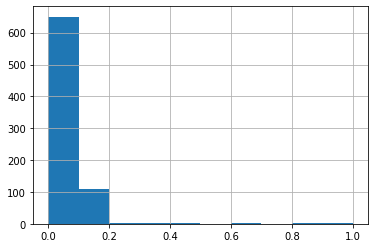

In [32]:
(cent_std_f["Holistic"]).hist()

### 3.4 Normalize table

Same procedure as standardization

In [33]:
cent_norm = cent.copy(deep=True)
for i in cent:
  if (i != "File"):
    col = cent[i]
    cent_norm[i] = (col - np.min(col)) / (np.max(col) - np.min(col))

cent_norm

,File,Degree,Closeness,Betweenness,Eigenvector,Hub,Authority
0,Llop_2010_AuOr_28_Rec._OBO_160_5.txt,0.438849,0.862932,0.272794,1.405046e-04,7.455161e-15,9.010475e-15
1,Goetze_1937_JAOS57_Subartu.txt,1.000000,1.000000,1.000000,2.970610e-04,1.576210e-14,1.905045e-14
2,"Carruba, Giorgieri & Mora eds - Atti del il co...",0.000000,0.613149,0.000000,9.801736e-06,5.200653e-16,6.285578e-16
3,"Dercksen, J.G. et al. - Veenhof Anniversary Vo...",0.014388,0.824910,0.108333,3.206459e-05,1.701292e-15,2.056202e-15
4,"Veenhof, Klaas R. - Review of Notes on a New V...",0.007194,0.715814,0.019383,1.134110e-05,6.017407e-16,7.272715e-16
...,...,...,...,...,...,...,...
764,Tosun_1965_LandsbergerFS_styles.txt,0.000000,0.428257,0.000000,1.093649e-07,5.802684e-18,7.013185e-18
765,OzgucT_1994_HroudaFS_cult_vessel.txt,0.000000,0.428257,0.000000,1.093649e-07,5.802684e-18,7.013185e-18
766,Ozkan_1993_OsgucNFS_seals_2kings_page_missing.txt,0.000000,0.428257,0.000000,1.093649e-07,5.802684e-18,7.013185e-18
767,"Van Loon, Maurits N. - Anatolia in the Second ...",0.000000,0.428257,0.000000,1.093649e-07,5.802684e-18,7.013185e-18


#### 3.4.1 Adding holistic value

In [34]:
cent_norm_f = cent_norm.copy(deep=True)

hol = cent_norm_f.iloc[:, 1:].sum(axis=1)

cent_norm_f["Holistic"] = (hol - np.min(hol)) / (np.max(hol) - np.min(hol))
cent_norm_f

,File,Degree,Closeness,Betweenness,Eigenvector,Hub,Authority,Holistic
0,Llop_2010_AuOr_28_Rec._OBO_160_5.txt,0.438849,0.862932,0.272794,1.405046e-04,7.455161e-15,9.010475e-15,0.332730
1,Goetze_1937_JAOS57_Subartu.txt,1.000000,1.000000,1.000000,2.970610e-04,1.576210e-14,1.905045e-14,0.633948
2,"Carruba, Giorgieri & Mora eds - Atti del il co...",0.000000,0.613149,0.000000,9.801736e-06,5.200653e-16,6.285578e-16,0.129557
3,"Dercksen, J.G. et al. - Veenhof Anniversary Vo...",0.014388,0.824910,0.108333,3.206459e-05,1.701292e-15,2.056202e-15,0.200237
4,"Veenhof, Klaas R. - Review of Notes on a New V...",0.007194,0.715814,0.019383,1.134110e-05,6.017407e-16,7.272715e-16,0.156866
...,...,...,...,...,...,...,...,...
764,Tosun_1965_LandsbergerFS_styles.txt,0.000000,0.428257,0.000000,1.093649e-07,5.802684e-18,7.013185e-18,0.090489
765,OzgucT_1994_HroudaFS_cult_vessel.txt,0.000000,0.428257,0.000000,1.093649e-07,5.802684e-18,7.013185e-18,0.090489
766,Ozkan_1993_OsgucNFS_seals_2kings_page_missing.txt,0.000000,0.428257,0.000000,1.093649e-07,5.802684e-18,7.013185e-18,0.090489
767,"Van Loon, Maurits N. - Anatolia in the Second ...",0.000000,0.428257,0.000000,1.093649e-07,5.802684e-18,7.013185e-18,0.090489


Dist of new col

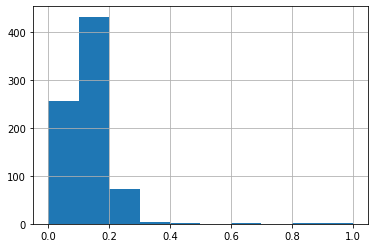

In [35]:
(cent_norm_f["Holistic"]).hist()

#### 3.5 Comparison of standardize vs normalize

Seems like the difference can get to around 0.03-0.06

In [36]:
cent_s = cent_std_f.copy(deep=True)
cent_n = cent_norm_f.copy(deep=True)

cent_s = cent_s.set_index(['File'])
cent_n = cent_n.set_index(['File'])

cent_s.sub(cent_n)["Holistic"].sort_values()

File
parpola1985.txt                                                                                                                       -0.083951
AnSt 33, 1983.txt                                                                                                                     -0.083951
Rigg_1937_JAOS57_Armanum_Urartu.txt                                                                                                   -0.083951
Dercksen, J. G. ed. - Assyria and Beyond, Studies Presented to Mogens Trolle Larsen, FS Larsen. PIHANS 100, 2004 (2).txt              -0.083184
vandemeiroop1999b.txt                                                                                                                 -0.083184
                                                                                                                                         ...   
pru3pt1000.txt                                                                                                                     

<a name='nde'></a>
# 4. Node Lookup & Ranking Table

Be able to find edges and centrality ranking for a given pdf

PDF name:

In [37]:
input_pdf = "Jacobsen_1943_JNES2_Primitive_Democracy.txt"

#### 4.1 Find edges for node

In [38]:
edge_list = []
elist = G.edges(input_pdf)
for i in list(elist):
  edge_list.append(i[1])

edge_list

[]

### 4.2 Ranking table

The holistic value could also be displayed by changing cent to cent_std_f or cent_norm_f but right now it weights everything equally so it is essentially useless (basically an average of the other values).

In [39]:
cent_rank = cent.copy(deep=True)

cols = cent.columns.drop("File")

for colname in cent_rank[cols]:
  c = cent_rank[colname]
  cent_rank[str(colname) + " Rank"] = c.rank(ascending=False)

cent_rank

,File,Degree,Closeness,Betweenness,Eigenvector,Hub,Authority,Degree Rank,Closeness Rank,Betweenness Rank,Eigenvector Rank,Hub Rank,Authority Rank
0,Llop_2010_AuOr_28_Rec._OBO_160_5.txt,0.080729,0.205029,0.039942,6.264722e-05,3.601029e-16,4.352285e-16,10.0,3.0,5.0,166.0,166.0,166.0
1,Goetze_1937_JAOS57_Subartu.txt,0.182292,0.237389,0.146419,1.324514e-04,7.613488e-16,9.201845e-16,1.0,1.0,1.0,164.0,164.0,164.0
2,"Carruba, Giorgieri & Mora eds - Atti del il co...",0.001302,0.146058,0.000000,4.370329e-06,2.512045e-17,3.036092e-17,504.5,168.5,443.5,363.5,363.5,363.5
3,"Dercksen, J.G. et al. - Veenhof Anniversary Vo...",0.003906,0.196052,0.015862,1.429674e-05,8.217666e-17,9.931970e-17,77.0,5.0,15.0,209.0,209.0,209.0
4,"Veenhof, Klaas R. - Review of Notes on a New V...",0.002604,0.170296,0.002838,5.056691e-06,2.906558e-17,3.512903e-17,183.5,49.5,25.5,326.5,326.5,326.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,Tosun_1965_LandsbergerFS_styles.txt,0.001302,0.102408,0.000000,4.876284e-08,2.802842e-19,3.387544e-19,504.5,450.5,443.5,544.5,544.5,544.5
765,OzgucT_1994_HroudaFS_cult_vessel.txt,0.001302,0.102408,0.000000,4.876284e-08,2.802842e-19,3.387544e-19,504.5,450.5,443.5,544.5,544.5,544.5
766,Ozkan_1993_OsgucNFS_seals_2kings_page_missing.txt,0.001302,0.102408,0.000000,4.876284e-08,2.802842e-19,3.387544e-19,504.5,450.5,443.5,544.5,544.5,544.5
767,"Van Loon, Maurits N. - Anatolia in the Second ...",0.001302,0.102408,0.000000,4.876284e-08,2.802842e-19,3.387544e-19,504.5,450.5,443.5,544.5,544.5,544.5


In [40]:
cent_rank.sort_values("Eigenvector", ascending=False)


,File,Degree,Closeness,Betweenness,Eigenvector,Hub,Authority,Degree Rank,Closeness Rank,Betweenness Rank,Eigenvector Rank,Hub Rank,Authority Rank
117,"Günbatti, Cahit - Die Beziehungen zwischen as...",0.160156,0.170009,0.020560,4.458730e-01,4.830250e-02,4.830250e-02,2.0,52.0,10.0,1.0,1.0,1.0
116,Hecker_1978b_OrNS47_tib'imma.txt,0.148438,0.162723,0.016623,4.308992e-01,4.668035e-02,4.668035e-02,3.0,98.0,14.0,2.0,2.0,2.0
118,Kienast_1975_WdO8_Pfandrecht.txt,0.125000,0.149877,0.012432,3.820192e-01,4.138505e-02,4.138505e-02,6.0,162.0,18.0,3.0,3.0,3.0
195,Cecen_Hecker_1995_SodenFS_matika_eblum.txt,0.003906,0.106454,0.000000,7.265564e-02,7.870863e-03,7.870863e-03,77.0,408.5,443.5,36.5,36.5,36.5
137,"Petschow, Kaufformulare.txt",0.003906,0.106454,0.000000,7.265564e-02,7.870863e-03,7.870863e-03,77.0,408.5,443.5,36.5,36.5,36.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,Matous_1978_ArOr46_datierung.txt,0.001302,0.004908,0.000000,1.628841e-35,2.116301e-141,5.238045e-141,504.5,764.0,443.5,764.0,763.5,764.0
534,"Barjamovic, Hertel, Larsen - Ups and downs at ...",0.001302,0.004908,0.000000,1.628841e-35,2.116301e-141,5.238045e-141,504.5,764.0,443.5,764.0,763.5,764.0
540,Gunbatti_2008_AOF 35-1_An Eponym List - KEL G ...,0.001302,0.004908,0.000000,1.628841e-35,2.116301e-141,5.238045e-141,504.5,764.0,443.5,764.0,763.5,764.0
753,pru3pt1000.txt,0.001302,0.001302,0.000000,7.200002e-48,3.106304e-213,5.381878e-212,504.5,768.5,443.5,768.5,768.5,768.5


#### 4.2.1 Node Ranking


In [41]:
cent_rank[cent_rank["File"] == input_pdf]

,File,Degree,Closeness,Betweenness,Eigenvector,Hub,Authority,Degree Rank,Closeness Rank,Betweenness Rank,Eigenvector Rank,Hub Rank,Authority Rank


<a name='bokeh'></a>
# 5. Import Bokeh

In [42]:
import bokeh.io
from bokeh.io import output_file, show
from bokeh.resources import INLINE
from bokeh.models import (BoxSelectTool, Circle, EdgesAndLinkedNodes, HoverTool,
                          MultiLine, NodesAndLinkedEdges, Plot, Range1d, TapTool,
                         BoxZoomTool, ResetTool, OpenURL, CustomJS, Column, SaveTool)
from bokeh.palettes import Spectral4
from bokeh.plotting import figure, output_notebook
from bokeh.models.graphs import from_networkx
from bokeh.models import TextInput, Button

### 5.1 Random examples from documentation

In [43]:
bokeh.io.output_notebook(INLINE)
plot = figure(title="Networkx Integration Demonstration", x_range=(-1.1,1.1), y_range=(-1.1,1.1),
              tools="", toolbar_location=None)

graph = from_networkx(G, nx.spring_layout, scale=2, center=(0,0))
plot.renderers.append(graph)

output_file("networkx_graph.html")
show(plot)

Output hidden; open in https://colab.research.google.com to view.

In [44]:
plot = Plot(plot_width=400, plot_height=400,
            x_range=Range1d(-1.1,1.1), y_range=Range1d(-1.1,1.1))
plot.title.text = "Graph Interaction Demonstration"

plot.add_tools(HoverTool(tooltips=None), TapTool(), BoxSelectTool())

graph_renderer = from_networkx(G, nx.circular_layout, scale=1, center=(0,0))

graph_renderer.node_renderer.glyph = Circle(size=15, fill_color=Spectral4[0])
graph_renderer.node_renderer.selection_glyph = Circle(size=15, fill_color=Spectral4[2])
graph_renderer.node_renderer.hover_glyph = Circle(size=15, fill_color=Spectral4[1])

graph_renderer.edge_renderer.glyph = MultiLine(line_color="#CCCCCC", line_alpha=0.8, line_width=5)
graph_renderer.edge_renderer.selection_glyph = MultiLine(line_color=Spectral4[2], line_width=5)
graph_renderer.edge_renderer.hover_glyph = MultiLine(line_color=Spectral4[1], line_width=5)

graph_renderer.selection_policy = NodesAndLinkedEdges()
graph_renderer.inspection_policy = EdgesAndLinkedNodes()

plot.renderers.append(graph_renderer)

output_file("interactive_graphs.html")
show(plot)

Output hidden; open in https://colab.research.google.com to view.

In [45]:
SAME_CLUB_COLOR, DIFFERENT_CLUB_COLOR = "black", "red"
edge_attrs = {}

for start_node, end_node, _ in G.edges(data=True):
    edge_color = SAME_CLUB_COLOR if G.nodes[start_node] == G.nodes[end_node] else DIFFERENT_CLUB_COLOR
    edge_attrs[(start_node, end_node)] = edge_color

nx.set_edge_attributes(G, edge_attrs, "edge_color")

# Show with Bokeh
plot = Plot(plot_width=400, plot_height=400,
            x_range=Range1d(-1.1, 1.1), y_range=Range1d(-1.1, 1.1))
plot.title.text = "Graph Interaction Demonstration"

node_hover_tool = HoverTool(tooltips=[("index", "@index"), ("degree", "@degree")])
plot.add_tools(node_hover_tool, BoxZoomTool(), ResetTool())

graph_renderer = from_networkx(G, nx.spring_layout, scale=1, center=(0, 0))

graph_renderer.node_renderer.glyph = Circle(size=15, fill_color=Spectral4[0])
graph_renderer.edge_renderer.glyph = MultiLine(line_color="edge_color", line_alpha=0.8, line_width=1)
plot.renderers.append(graph_renderer)

output_file("interactive_graphs.html")
show(plot)

Output hidden; open in https://colab.research.google.com to view.

<a name='att'></a>
# 6. Node attributes for "clubs" argument in previous example (Bokeh)

In [46]:
import copy
G_att = copy.deepcopy(G)
nx.set_node_attributes(G_att, betweenness_centrality, "betweenness")

In [47]:
SAME_CLUB_COLOR, DIFFERENT_CLUB_COLOR = "black", "red"
edge_attrs = {}

for start_node, end_node, _ in G_att.edges(data=True):
    edge_color = SAME_CLUB_COLOR if G_att.nodes[start_node]["betweenness"] == G_att.nodes[end_node]["betweenness"] else DIFFERENT_CLUB_COLOR
    edge_attrs[(start_node, end_node)] = edge_color

nx.set_edge_attributes(G_att, edge_attrs, "edge_color")

# Show with Bokeh
plot = Plot(plot_width=400, plot_height=400,
            x_range=Range1d(-1.1, 1.1), y_range=Range1d(-1.1, 1.1))
plot.title.text = "Graph Interaction Demonstration"

node_hover_tool = HoverTool(tooltips=[("index", "@index"), ("betweenness", "@betweenness")])
plot.add_tools(node_hover_tool, BoxZoomTool(), ResetTool())

graph_renderer = from_networkx(G_att, nx.spring_layout, scale=1, center=(0, 0))

graph_renderer.node_renderer.glyph = Circle(size=15, fill_color=Spectral4[0])
graph_renderer.edge_renderer.glyph = MultiLine(line_color="edge_color", line_alpha=0.8, line_width=1)
plot.renderers.append(graph_renderer)

output_file("interactive_graphs.html")
show(plot)

Output hidden; open in https://colab.research.google.com to view.

<a name='stellar'></a>
# 7. Node2Vec (Stellar)

Making stellar graph

In [48]:
SG = StellarGraph.from_networkx(G_att, node_type_default="paper", edge_type_default="cites")
print(SG.info())


StellarGraph: Undirected multigraph
 Nodes: 769, Edges: 1099

 Node types:
  paper: [769]
    Features: none
    Edge types: paper-cites->paper

 Edge types:
    paper-cites->paper: [1099]
        Weights: all 1 (default)
        Features: none


#### The Node2Vec algorithm

(Based on https://stellargraph.readthedocs.io/en/stable/demos/node-classification/node2vec-node-classification.html) AND (https://graphsandnetworks.com/node2vec-embedding/)

The Node2Vec algorithm introduced in [1] is a 2-step representation learning algorithm. The two steps are,

-Use second-order random walks to generate sentences from a graph. A sentence is a list of node ids. The set of all sentences makes a corpus.

-The corpus is then used to learn an embedding vector for each node in the graph. Each node id is considered a unique word/token in a dictionary that has size equal to the number of nodes in the graph. The Word2Vec algorithm [2], is used for calculating the embedding vectors.

Corpus generation using random walks

The stellargraph library provides an implementation for second-order random walks as required by Node2Vec. The random walks have fixed maximum length and are controlled by two parameters p and q. See [1] for a detailed description of these parameters.

We are going to start 10 random walks from each node in the graph with a length up to 100. We set parameter p to 0.5 and q to 2.0.

In [49]:
rw = BiasedRandomWalk(SG)

walks = rw.run(
    nodes=list(G_att.nodes()),  # root nodes
    length=100,  # maximum length of a random walk
    n=10,  # number of random walks per root node
    p=0.5,  # Defines (unormalised) probability, 1/p, of returning to source node
    q=2.0,  # Defines (unormalised) probability, 1/q, for moving away from source node
)
print("Number of random walks: {}".format(len(walks)))

Number of random walks: 7690


Representation Learning using Word2Vec

In [50]:
str_walks = [[str(n) for n in walk] for walk in walks]
model = Word2Vec(str_walks, size=128, window=5, min_count=0, sg=1, workers=2, iter=1)
model.wv["Garelli_Michel_1994_AMMY93_tablets_Ankara.txt"].shape

(128,)

The value of an embedding is for instance

In [51]:
model.wv["Garelli_Michel_1994_AMMY93_tablets_Ankara.txt"]

array([-0.10014904,  0.45484862,  0.14047025,  0.28922343,  0.34034306,
        0.27165616,  0.0288371 , -0.18951009,  0.522269  , -0.65140957,
       -0.0580136 ,  0.28041342, -0.06098919, -0.02382207, -0.07077358,
       -0.61852133, -0.32923636, -0.15681878,  0.3707412 , -0.2349724 ,
        0.3539069 , -0.34597024, -0.12252717, -0.24183294,  0.4353458 ,
        0.32628572,  0.06803504, -0.19220078,  0.33127844, -0.532236  ,
        0.03932573,  0.29736674, -0.6824101 , -0.15838471, -0.3148663 ,
       -0.4106499 ,  0.6255182 , -0.18978177,  0.51013166,  0.18132591,
        0.12508506,  0.57394814,  0.24560772, -0.22338079, -0.07402217,
       -0.964352  , -0.0144662 ,  0.2733341 , -0.1811105 , -0.2248732 ,
       -0.00264141,  0.21456996,  0.6786064 ,  0.4041319 , -0.5875006 ,
       -0.9876355 , -0.43865773,  0.74444157,  0.05949619,  0.81546605,
       -0.31222445,  0.5926879 , -0.04467301,  0.28733322, -0.33818257,
       -0.3714834 ,  0.54171854, -0.5413598 , -0.05519545, -0.58

Visualise Node Embeddings

In order to visualize the embedding one has to somehow reduce the dimension. This is most easily done via t-SNE.

We retrieve the Word2Vec node embeddings that are 128-dimensional vectors and then we project them down to 2 dimensions using the t-SNE algorithm.

In [52]:
# Retrieve node embeddings and corresponding subjects
node_ids = model.wv.index2word  # list of node IDs
node_embeddings = (
    model.wv.vectors
)  # numpy.ndarray of size number of nodes times embeddings dimensionality
node_targets = [ G_att.nodes[node_id]['betweenness'] for node_id in node_ids]

In [53]:
# Apply t-SNE transformation on node embeddings
tsne = TSNE(n_components=2)
node_embeddings_2d = tsne.fit_transform(node_embeddings)

Not using "club" but rather "Betweenness"....

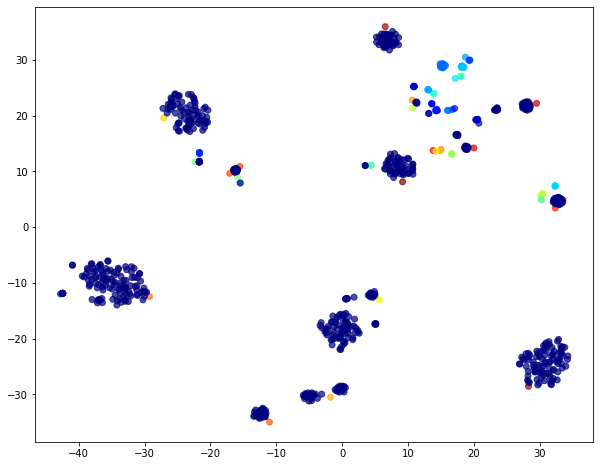

In [54]:
# draw the points
alpha = 0.7
label_map = {l: i for i, l in enumerate(np.unique(node_targets))}
node_colours = [label_map[target] for target in node_targets]

plt.figure(figsize=(10, 8))
plt.scatter(
    node_embeddings_2d[:, 0],
    node_embeddings_2d[:, 1],
    c=node_colours,
    cmap="jet",
    alpha=alpha,
)

<a name='DiGraph'></a>
# 9. Directed Graph Creation w/ HITS attribute (from undirected)

Converting from an undirected graph to a directed one in D2V2N's CSV:

Hub/authority are the same because the graph is undirected.
When comparing the two nodes for an edge,
- Lower score hub/authority -> target
- Save hub/authority col as new attribute "HITS"

### 9.2.1 Creating the directed graph

Tables needed from before:

In [55]:
cent

,File,Degree,Closeness,Betweenness,Eigenvector,Hub,Authority
0,Llop_2010_AuOr_28_Rec._OBO_160_5.txt,0.080729,0.205029,0.039942,6.264722e-05,3.601029e-16,4.352285e-16
1,Goetze_1937_JAOS57_Subartu.txt,0.182292,0.237389,0.146419,1.324514e-04,7.613488e-16,9.201845e-16
2,"Carruba, Giorgieri & Mora eds - Atti del il co...",0.001302,0.146058,0.000000,4.370329e-06,2.512045e-17,3.036092e-17
3,"Dercksen, J.G. et al. - Veenhof Anniversary Vo...",0.003906,0.196052,0.015862,1.429674e-05,8.217666e-17,9.931970e-17
4,"Veenhof, Klaas R. - Review of Notes on a New V...",0.002604,0.170296,0.002838,5.056691e-06,2.906558e-17,3.512903e-17
...,...,...,...,...,...,...,...
764,Tosun_1965_LandsbergerFS_styles.txt,0.001302,0.102408,0.000000,4.876284e-08,2.802842e-19,3.387544e-19
765,OzgucT_1994_HroudaFS_cult_vessel.txt,0.001302,0.102408,0.000000,4.876284e-08,2.802842e-19,3.387544e-19
766,Ozkan_1993_OsgucNFS_seals_2kings_page_missing.txt,0.001302,0.102408,0.000000,4.876284e-08,2.802842e-19,3.387544e-19
767,"Van Loon, Maurits N. - Anatolia in the Second ...",0.001302,0.102408,0.000000,4.876284e-08,2.802842e-19,3.387544e-19


In [56]:
df

,Source,Target,Similarity
0,Llop_2010_AuOr_28_Rec._OBO_160_5.txt,Goetze_1937_JAOS57_Subartu.txt,0.909456
1,Llop_2010_AuOr_28_Rec._OBO_160_5.txt,"Carruba, Giorgieri & Mora eds - Atti del il co...",0.906704
2,Llop_2010_AuOr_28_Rec._OBO_160_5.txt,"Dercksen, J.G. et al. - Veenhof Anniversary Vo...",0.921105
3,Llop_2010_AuOr_28_Rec._OBO_160_5.txt,"Veenhof, Klaas R. - Review of Notes on a New V...",0.903310
4,Llop_2010_AuOr_28_Rec._OBO_160_5.txt,zaccagnini1999.txt,0.901022
...,...,...,...
1094,OzgucN_1994_HroudaFS_seals1a-b.txt,OzgucT_1994_HroudaFS_cult_vessel.txt,0.953381
1095,OzgucN_1994_HroudaFS_seals1a-b.txt,"Lassen, Agnete Wisti - Glyptic Encounters, 201...",0.950107
1096,OzgucN_1994_HroudaFS_seals1a-b.txt,Ozkan_1993_OsgucNFS_seals_2kings_page_missing.txt,0.923967
1097,OzgucN_1994_HroudaFS_seals1a-b.txt,"Van Loon, Maurits N. - Anatolia in the Second ...",0.951878


Dictionary with files as keys and hub/authority as values

In [57]:
di_creation_dict = pd.Series(cent["Authority"].values,index=cent["File"]).to_dict()

for k,v in sorted(di_creation_dict.items())[:10]:
  print (k, v)

ANADOLUNUN_ONSOZU_KULTEPE_KANIS-libre.txt 1.2148137173203266e-49
Albayrak, Irfan - Fünf Urkunden aus dem Archiv von Peruwa, Sohn von Suppibra. JEOL 39, 2005 95-105.txt 0.0027879168125555065
Albayrak, Irfan - Kultepe Tabletleri IV. Kt.T-6 Dizi - Sa. 33b, 2006.txt 1.120767836398124e-49
Albayrak, İrfan - 1963 yili kazilarinda ele geçen yerlı halkla ılgılı bır kültepe tabletı. UHKB 5, 2005 21-32.txt 1.120767836398124e-49
Albayrak_2000_ArAn4_testament.txt 0.007870863029692539
Albayrak_2000_ArAn4_vasiyetname.txt 1.120767836398124e-49
Albayrak_2001_AMMY2000_ma'usu.txt 1.120767836398124e-49
Albayrak_2002_ArAn5_listesi.txt 1.120767836398124e-49
Albayrak_2003_ArAn6_karum.txt 1.120767836398124e-49
Albayrak_2003a_kütepe belgelerine göre.txt 1.120767836398124e-49


Modifying df

In [58]:
di_creation_df = df.copy(deep = True)

ccvert = []
cctarg = []
for i, j in zip(di_creation_df["Source"], di_creation_df["Target"]):
  ccvert.append(di_creation_dict[i])
  cctarg.append(di_creation_dict[j])

di_creation_df["Source_W"] = ccvert
di_creation_df["Target_W"] = cctarg

di_creation_df

,Source,Target,Similarity,Source_W,Target_W
0,Llop_2010_AuOr_28_Rec._OBO_160_5.txt,Goetze_1937_JAOS57_Subartu.txt,0.909456,4.352285e-16,9.201845e-16
1,Llop_2010_AuOr_28_Rec._OBO_160_5.txt,"Carruba, Giorgieri & Mora eds - Atti del il co...",0.906704,4.352285e-16,3.036092e-17
2,Llop_2010_AuOr_28_Rec._OBO_160_5.txt,"Dercksen, J.G. et al. - Veenhof Anniversary Vo...",0.921105,4.352285e-16,9.931970e-17
3,Llop_2010_AuOr_28_Rec._OBO_160_5.txt,"Veenhof, Klaas R. - Review of Notes on a New V...",0.903310,4.352285e-16,3.512903e-17
4,Llop_2010_AuOr_28_Rec._OBO_160_5.txt,zaccagnini1999.txt,0.901022,4.352285e-16,1.092094e-16
...,...,...,...,...,...
1094,OzgucN_1994_HroudaFS_seals1a-b.txt,OzgucT_1994_HroudaFS_cult_vessel.txt,0.953381,4.856109e-18,3.387544e-19
1095,OzgucN_1994_HroudaFS_seals1a-b.txt,"Lassen, Agnete Wisti - Glyptic Encounters, 201...",0.950107,4.856109e-18,3.404190e-19
1096,OzgucN_1994_HroudaFS_seals1a-b.txt,Ozkan_1993_OsgucNFS_seals_2kings_page_missing.txt,0.923967,4.856109e-18,3.387544e-19
1097,OzgucN_1994_HroudaFS_seals1a-b.txt,"Van Loon, Maurits N. - Anatolia in the Second ...",0.951878,4.856109e-18,3.387544e-19


Now that we have hub/authority values in the same table as edgelist, we can build a directed graph manually.

In [60]:
diG = nx.DiGraph()
diG.add_nodes_from(G)

for k, v in di_creation_dict.items():
  diG.nodes[k]["HITS"] = v

for row in di_creation_df.itertuples():

  if (row.Source_W < row.Target_W):
    diG.add_edge(row.Target, row.Source, weight=row.Similarity, HITS=row.Target)
  else:
    diG.add_edge(row.Source, row.Target, weight=row.Similarity, HITS=row.Source)


diG.nodes.data()

NodeDataView({'Llop_2010_AuOr_28_Rec._OBO_160_5.txt': {'HITS': 4.3522846591703986e-16}, 'Goetze_1937_JAOS57_Subartu.txt': {'HITS': 9.201845215684323e-16}, 'Carruba, Giorgieri & Mora eds - Atti del il congresson internazionale di Hittitologia. StMed 9, 1995.txt': {'HITS': 3.036091522865964e-17}, 'Dercksen, J.G. et al. - Veenhof Anniversary Volume. PIHANS 89, 2001.txt': {'HITS': 9.931969563665481e-17}, 'Veenhof, Klaas R. - Review of Notes on a New Volume of Old Assyrian Texts by Karl Hecker. JAOS 122 4, 2002, pp. 797-802.txt': {'HITS': 3.512903490101799e-17}, 'zaccagnini1999.txt': {'HITS': 1.0920936356279233e-16}, 'Larsen 1989.txt': {'HITS': 1.399071034080329e-16}, 'vandemeiroop1999b.txt': {'HITS': 1.3444319010152952e-16}, 'Lassen_2010_Tools__Procedures_and_Professions_Textile_Terminologies_ATS_8-libre.txt': {'HITS': 3.036091522865964e-17}, 'Melchert_aspect1.txt': {'HITS': 3.036091522865964e-17}, 'Rigg_1937_JAOS57_Armanum_Urartu.txt': {'HITS': 1.5048314234827422e-16}, 'Wiseman & Hawkins 

Bokeh example

In [61]:
SAME_CLUB_COLOR, DIFFERENT_CLUB_COLOR = "black", "red"
edge_attrs = {}

for start_node, end_node, _ in diG.edges(data=True):
    edge_color = SAME_CLUB_COLOR if diG.nodes[start_node]["HITS"] == diG.nodes[end_node]["HITS"] else DIFFERENT_CLUB_COLOR
    edge_attrs[(start_node, end_node)] = edge_color

nx.set_edge_attributes(diG, edge_attrs, "edge_color")

# Show with Bokeh
plot = Plot(plot_width=400, plot_height=400,
            x_range=Range1d(-1.1, 1.1), y_range=Range1d(-1.1, 1.1))
plot.title.text = "Graph Interaction Demonstration"

node_hover_tool = HoverTool(tooltips=[("index", "@index"), ("HITS", "@HITS")])
plot.add_tools(node_hover_tool, BoxZoomTool(), ResetTool())

graph_renderer = from_networkx(diG, nx.spring_layout, scale=1, center=(0, 0))

graph_renderer.node_renderer.glyph = Circle(size=15, fill_color=Spectral4[0])
graph_renderer.edge_renderer.glyph = MultiLine(line_color="edge_color", line_alpha=0.8, line_width=1)
plot.renderers.append(graph_renderer)

output_file("interactive_graphs.html")
show(plot)

Output hidden; open in https://colab.research.google.com to view.

Directed graph visualization



In [62]:

options = {
    "font_size": 8,
    "node_size": 6,
    "node_color": "red",
    "edgecolors": "black",
    "width": 0.15,
    'arrowstyle': '-|>',
    'arrowsize': 12,
}

plt.figure(3,figsize=(40,40))
pos = nx.spring_layout(diG, k=0.15, iterations=20) 
nx.draw_networkx(diG, pos, arrows=True, **options)

images_dir = save_folder
plt.savefig(f"{images_dir}/test_directed_graph.png")


Output hidden; open in https://colab.research.google.com to view.

<a name='cliq'></a>
# 10. Cliques

Running down the functions in NetworkX...

<br>

Cliques - Functions for finding and manipulating cliques.

Finding the largest clique in a graph is NP-complete problem, so most of these algorithms have an exponential running time; for more information, see the Wikipedia article on the clique problem

Enumerate_all_cliques

To obtain a list of all cliques, use list(enumerate_all_cliques(G)). However, be aware that in the worst-case, the length of this list can be exponential in the number of nodes in the graph (for example, when the graph is the complete graph). This function avoids storing all cliques in memory by only keeping current candidate node lists in memory during its search.

The implementation is adapted from the algorithm by Zhang, et al. (2005) 1 to output all cliques discovered.

In [63]:
nx.enumerate_all_cliques(G)

<generator object enumerate_all_cliques at 0x7f6b69b13050>

Crashes with too much RAM

In [64]:
#list(nx.enumerate_all_cliques(G))

In [65]:
list(nx.find_cliques(G))[0:3]

[['Melchert_tarhuntassa.txt', 'Goetze_1953b_Language29_PN.txt'],
 ['Hurowitz_90_LKA63.txt', 'kuhrt1988.txt'],
 ['Esin_FSOzgucT_Trading_center.txt',
  'Anastasio, Stefano - The Archaeology of Upper Mesopotamia. Subartu 1, 1995 (grey).txt']]

Returns the clique number of the graph.

In [66]:
nx.graph_clique_number(G)

4

Returns the number of maximal cliques in the graph.

In [67]:
nx.graph_number_of_cliques(G)

868

Returns the number of maximal cliques for each node.

In [68]:
nx.number_of_cliques(G)

{'ANADOLUNUN_ONSOZU_KULTEPE_KANIS-libre.txt': 2,
 'Albayrak, Irfan - Fünf Urkunden aus dem Archiv von Peruwa, Sohn von Suppibra. JEOL 39, 2005 95-105.txt': 1,
 'Albayrak, Irfan - Kultepe Tabletleri IV. Kt.T-6 Dizi - Sa. 33b, 2006.txt': 1,
 'Albayrak, İrfan - 1963 yili kazilarinda ele geçen yerlı halkla ılgılı bır kültepe tabletı. UHKB 5, 2005 21-32.txt': 1,
 'Albayrak_2000_ArAn4_testament.txt': 1,
 'Albayrak_2000_ArAn4_vasiyetname.txt': 1,
 "Albayrak_2001_AMMY2000_ma'usu.txt": 1,
 'Albayrak_2002_ArAn5_listesi.txt': 1,
 'Albayrak_2003_ArAn6_karum.txt': 1,
 'Albayrak_2003a_kütepe belgelerine göre.txt': 1,
 'Albayrak_2004_ArAn7_usbat_aklat.txt': 1,
 'Albayrak_2005_5UHKB_1963 yili kazilarinda_p21-32.txt': 1,
 'Albayrak_2005a_kumaṣ ve kalay sevkiyatina iliṣkin.txt': 1,
 "Albayrak_2005d_Kültepe'den bir toplu kayit belgesi.txt": 1,
 'Albayrak_2007_Eine altassyrische Urkunde... Altorientalsche Forschungen.txt': 1,
 'Albayrak_2008_A rubaum Letter Sent to .., Fs. Garelli.txt': 1,
 'Alex

Unfortunately, the cliques frequently overlap, and a single event or phenomena might result in multiple cliques. Other algorithms (n-clans, k_plexes, etc) exist to help solve this problem—but they are not yet implemented in NetworkX

<a name='kmc'></a>
# 11. K-Means Clustering

K-means is considered by many to be the gold standard when it comes to clustering due to its simplicity and performance, so it's the first one we'll try out.

When you have no idea at all what algorithm to use, K-means is usually the first choice.

K-means works by defining spherical clusters that are separable in a way so that the mean value converges towards the cluster center. Because of this, K-Means may underperform sometimes.

### 11.1 Clustering, Connectivity and other Graph properties using Networkx

https://www.geeksforgeeks.org/python-clustering-connectivity-and-other-graph-properties-using-networkx/

Returns a Dictionary with clustering value of each node

In [69]:
print(nx.clustering(G))

{'Llop_2010_AuOr_28_Rec._OBO_160_5.txt': 0.020624008461131677, 'Goetze_1937_JAOS57_Subartu.txt': 0.007605344295991778, 'Carruba, Giorgieri & Mora eds - Atti del il congresson internazionale di Hittitologia. StMed 9, 1995.txt': 0, 'Dercksen, J.G. et al. - Veenhof Anniversary Volume. PIHANS 89, 2001.txt': 0.3333333333333333, 'Veenhof, Klaas R. - Review of Notes on a New Volume of Old Assyrian Texts by Karl Hecker. JAOS 122 4, 2002, pp. 797-802.txt': 0, 'zaccagnini1999.txt': 0.3333333333333333, 'Larsen 1989.txt': 0.3333333333333333, 'vandemeiroop1999b.txt': 0.16666666666666666, 'Lassen_2010_Tools__Procedures_and_Professions_Textile_Terminologies_ATS_8-libre.txt': 0, 'Melchert_aspect1.txt': 0, 'Rigg_1937_JAOS57_Armanum_Urartu.txt': 0.3333333333333333, 'Wiseman & Hawkins eds - RAI 23, Iraq 39, 1977.txt': 0.16666666666666666, 'Johnson_2006_RBL_Rev_Haselbach_Sarg_Akk.txt': 0.6666666666666666, 'Hallo_1977_HUCA48_new_moons_sabbaths.txt': 0, 'Michel_2010_IstExhibition_Writing.txt': 0, 'nissen198

Get the Clustering value for the whole Graph (0 - 1)

In [70]:
nx.average_clustering(G)

0.17809448695142135

Transitivity of a Graph = 3 * Number of triangles in a Graph / Number of connected triads in the Graph.

In other words, it is the fraction of all possible triangles present in G

also (0-1)

In [71]:
nx.transitivity(G)

0.017499005738310324

Now, we know that the graph is connected. Networkx provides a number of in built functions to check on the various Connectivity features of a Graph.
If it were not connected, there would be many useful functions..

In [72]:
print(nx.is_connected(G))

False


In [73]:
print(nx.number_connected_components(G))

6


Few important characteristics of a Graph

- Eccentricity: For a node n in a graph G, the eccentricity of n is the largest possible shortest path distance between n and all other nodes.
- Diameter : The maximum shortest distance between a pair of nodes in a graph G is its Diamater. It is the largest possible eccentricity value of a node.
- Radius : It is the minimum eccentricity value of a node.
- Periphery : It is the set of nodes that have their eccentricity equal to their Diameter.
- Center : Center of a Graph is the set of nodes whose eccentricity is equal to the radius of the Graph.

In [75]:
#print("Eccentricity: ", nx.eccentricity(G))
#print("Diameter: ", nx.diameter(G))
#print("Radius: ", nx.radius(G))
#print("Preiphery: ", list(nx.periphery(G)))
#print("Center: ", list(nx.center(G)))

### 11.2 Clustering Setup

https://www.learndatasci.com/tutorials/k-means-clustering-algorithms-python-intro/

In [76]:
from sklearn import cluster
import networkx as nx
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score

For small / moderate graphs, one simple option is to store the node names as a list:

In [77]:
nodes_list = np.array(list(G.nodes()))
nodes_list

array(['Llop_2010_AuOr_28_Rec._OBO_160_5.txt',
       'Goetze_1937_JAOS57_Subartu.txt',
       'Carruba, Giorgieri & Mora eds - Atti del il congresson internazionale di Hittitologia. StMed 9, 1995.txt',
       'Dercksen, J.G. et al. - Veenhof Anniversary Volume. PIHANS 89, 2001.txt',
       'Veenhof, Klaas R. - Review of Notes on a New Volume of Old Assyrian Texts by Karl Hecker. JAOS 122 4, 2002, pp. 797-802.txt',
       'zaccagnini1999.txt', 'Larsen 1989.txt', 'vandemeiroop1999b.txt',
       'Lassen_2010_Tools__Procedures_and_Professions_Textile_Terminologies_ATS_8-libre.txt',
       'Melchert_aspect1.txt', 'Rigg_1937_JAOS57_Armanum_Urartu.txt',
       'Wiseman & Hawkins eds - RAI 23, Iraq 39, 1977.txt',
       'Johnson_2006_RBL_Rev_Haselbach_Sarg_Akk.txt',
       'Hallo_1977_HUCA48_new_moons_sabbaths.txt',
       'Michel_2010_IstExhibition_Writing.txt', 'nissen1986.txt',
       'Farber_1985_JNES44_Rev_AssyrischeTempel.txt',
       'Wiseman_1953_JCS7_Txts_Frag.txt',
       'Veenhof, 

Added node_id and neighbor_id to find index of a text because the indices must be in integers, not strings.

Inspired: https://stackoverflow.com/questions/25160191/mapping-from-a-nodes-name-to-its-index-and-vice-versa-in-networkx , might not work well with huge graphs though.

In [78]:
def graph_to_edge_matrix(G):
    """Convert a networkx graph into an edge matrix.
    See https://www.wikiwand.com/en/Incidence_matrix for a good explanation on edge matrices
   
    Parameters
    ----------
    G : networkx graph
    """
    # Initialize edge matrix with zeros
    edge_mat = np.zeros((len(G), len(G)), dtype=int)

    # Loop to set 0 or 1 (diagonal elements are set to 1)
    for node in G:
      node_id = np.where(nodes_list == node)[0][0]
      for neighbor in G.neighbors(node):
        # To recover the index from the name:
        neighbor_id = np.where(nodes_list == neighbor)[0][0]
        edge_mat[node_id][neighbor_id] = 1
      edge_mat[node_id][node_id] = 1

    return edge_mat

In [79]:
Q = nx.karate_club_graph()
posQ = nx.spring_layout(Q)
edge_mat = graph_to_edge_matrix(G)
edge_mat

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])

### 11.3 Fitting K-Means & Other Clustering Models

In [80]:
k_clusters = 4
results = []
algorithms = {}

algorithms['kmeans'] = cluster.KMeans(n_clusters=k_clusters, n_init=200)

In [81]:
algorithms['kmeans'].fit(edge_mat)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=200, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Agglomerative Clustering

The main idea behind Agglomerative clustering is that each node first starts in its own cluster, and then pairs of clusters recursively merge together in a way that minimally increases a given linkage distance.

In [82]:
algorithms['agglom'] = cluster.AgglomerativeClustering(n_clusters=k_clusters, linkage="ward")

Spectral Clustering

In [83]:
algorithms['spectral'] = cluster.SpectralClustering(n_clusters=k_clusters, affinity="precomputed", n_init=200)

Affinity Propagation

Affinity propagation performs really well on several computer vision and biology problems, such as clustering pictures of human faces and identifying regulated transcripts

In [84]:
algorithms['affinity'] = cluster.AffinityPropagation(damping=0.6)

Fitting each model:

In [85]:
for model in algorithms.values():
    model.fit(edge_mat)
    results.append(list(model.labels_))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_affinity_propagation.py:226: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  "will not have any cluster centers.", ConvergenceWarning)


### 11.4 Metrics & Plotting

- Normalized Mutual Information (NMI) - Mutual Information of two random variables is a measure of the mutual dependence between the two variables. Normalized Mutual Information is a normalization of the Mutual Information (MI) score to scale the results between 0 (no mutual information) and 1 (perfect correlation). In other words, 0 means dissimilar and 1 means
a perfect match.

- Adjusted Rand Score (ARS) - Adjusted Rand Score on the other hand, computes a similarity measure between two clusters. ARS considers all pairs of samples and counts pairs that are assigned in the same or different clusters in the predicted and true clusters. If that's a little weird to think about, have in mind that, for now, 0 is the lowest similarity and 1 is the highest.

- Average score - average of NMI and ARS

Requires y_true

### 11.5 Visualization

In [86]:
#!pip3 install -U matplotlib

In [87]:
def draw_communities(G, membership, pos):
    """Draws the nodes to a plot with assigned colors for each individual cluster
    Parameters
    ----------
    G : networkx graph
    membership : list
        A list where the position is the student and the value at the position is the student club membership.
        E.g. `print(membership[8]) --> 1` means that student #8 is a member of club 1.
    pos : positioning as a networkx spring layout
        E.g. nx.spring_layout(G)
    """ 
    fig, ax = plt.subplots(figsize=(16,9))
    
    # Convert membership list to a dict where key=club, value=list of students in club
    club_dict = defaultdict(list)
    for student, club in enumerate(membership):
        club_dict[club].append(student)
    
    # Normalize number of clubs for choosing a color
    #norm = plt.colors.Normalize(vmin=0, vmax=len(club_dict.keys()))
    
    for club, members in club_dict.items():
        nx.draw_networkx_nodes(G, pos,
                               nodelist=members,
                               #node_color=cm.jet(norm(club)),
                               node_size=500,
                               alpha=0.8,
                               ax=ax)

    # Draw edges (social connections) and show final plot
    plt.title("Undirected D2V")
    nx.draw_networkx_edges(G, pos, alpha=0.5, ax=ax)

In [88]:
pos = nx.spring_layout(G)

Output for K-means clustering

In [89]:
algorithms['kmeans'].labels_

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 3, 3, 3, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

<a name='nkc'></a>
# 12. Node2Vec with K-Means Clustering

Combining the work of sections 7, 8, and 11.

Need to turn clustering labels into dictionary with nodes as keys.

In [90]:
G_nodelist = list(G.nodes)
clust_list = list(algorithms['kmeans'].labels_)

n2v_dict = {G_nodelist[i]: clust_list[i] for i in range(len(G_nodelist))}
#n2v_dict

In [91]:
import copy
G_n2v = copy.deepcopy(G)
nx.set_node_attributes(G_n2v, n2v_dict, "kmeans")

In [92]:
SAME_CLUB_COLOR, DIFFERENT_CLUB_COLOR = "black", "red"
edge_attrs = {}

for start_node, end_node, _ in G_n2v.edges(data=True):
    edge_color = SAME_CLUB_COLOR if G_n2v.nodes[start_node]["kmeans"] == G_n2v.nodes[end_node]["kmeans"] else DIFFERENT_CLUB_COLOR
    edge_attrs[(start_node, end_node)] = edge_color

nx.set_edge_attributes(G_n2v, edge_attrs, "edge_color")

# Show with Bokeh
plot = Plot(plot_width=400, plot_height=400,
            x_range=Range1d(-1.1, 1.1), y_range=Range1d(-1.1, 1.1))
plot.title.text = "Graph Interaction Demonstration"

node_hover_tool = HoverTool(tooltips=[("index", "@index"), ("kmeans", "@kmeans")])
plot.add_tools(node_hover_tool, BoxZoomTool(), ResetTool())

graph_renderer = from_networkx(G_n2v, nx.spring_layout, scale=1, center=(0, 0))

graph_renderer.node_renderer.glyph = Circle(size=15, fill_color=Spectral4[0])
graph_renderer.edge_renderer.glyph = MultiLine(line_color="edge_color", line_alpha=0.8, line_width=1)
plot.renderers.append(graph_renderer)

output_file("interactive_graphs.html")
show(plot)

Output hidden; open in https://colab.research.google.com to view.

Copied from part 8

In [93]:
SGn = StellarGraph.from_networkx(G_n2v, node_type_default="paper", edge_type_default="cites")
print(SGn.info())

StellarGraph: Undirected multigraph
 Nodes: 769, Edges: 1099

 Node types:
  paper: [769]
    Features: none
    Edge types: paper-cites->paper

 Edge types:
    paper-cites->paper: [1099]
        Weights: all 1 (default)
        Features: none


In [94]:
rw = BiasedRandomWalk(SGn)

walks = rw.run(
    nodes=list(G_n2v.nodes()),  # root nodes
    length=100,  # maximum length of a random walk
    n=10,  # number of random walks per root node
    p=0.5,  # Defines (unormalised) probability, 1/p, of returning to source node
    q=2.0,  # Defines (unormalised) probability, 1/q, for moving away from source node
)
print("Number of random walks: {}".format(len(walks)))

Number of random walks: 7690


In [95]:
str_walks = [[str(n) for n in walk] for walk in walks]
model = Word2Vec(str_walks, size=128, window=5, min_count=0, sg=1, workers=2, iter=1)
model.wv["Garelli_Michel_1994_AMMY93_tablets_Ankara.txt"].shape

(128,)

Value of embedding is for instance

In [96]:
model.wv["Garelli_Michel_1994_AMMY93_tablets_Ankara.txt"]

array([-5.37570715e-01,  4.30220038e-01, -1.33088857e-01,  2.62776703e-01,
        1.38892308e-01,  5.63724674e-02, -2.12772109e-04,  2.61966407e-01,
        5.21034479e-01, -2.02848509e-01, -4.41290557e-01,  2.02737287e-01,
        7.10397679e-03,  3.42586160e-01,  3.68851811e-01, -4.73838598e-01,
        2.08893679e-02, -2.29139015e-01,  3.73397827e-01, -3.60907018e-01,
        7.25732088e-01, -8.33880067e-01, -6.28315359e-02, -4.42031056e-01,
        3.26512933e-01,  1.02757756e-02, -1.38256729e-01,  3.61128569e-01,
       -2.32263487e-02, -1.21305846e-01, -1.64263293e-01,  1.87222764e-01,
       -5.17716408e-01,  3.81543767e-03, -6.25313222e-01,  5.20522781e-02,
        1.57762125e-01,  3.88410827e-03,  2.37780198e-01, -1.26262128e-01,
       -3.27295929e-01,  2.78355837e-01, -8.63403454e-02, -2.88110983e-04,
       -3.65750015e-01, -7.67208159e-01,  5.34132600e-01, -2.93202758e-01,
       -3.80235821e-01,  1.22120686e-01,  3.11636597e-01,  3.63297909e-01,
        4.02642488e-01,  

In [97]:
# Retrieve node embeddings and corresponding subjects
node_ids = model.wv.index2word  # list of node IDs
node_embeddings = (
    model.wv.vectors
)  # numpy.ndarray of size number of nodes times embeddings dimensionality
node_targets = [ G_n2v.nodes[node_id]['kmeans'] for node_id in node_ids]

In [98]:
# Apply t-SNE transformation on node embeddings
tsne = TSNE(n_components=2)
node_embeddings_2d = tsne.fit_transform(node_embeddings)

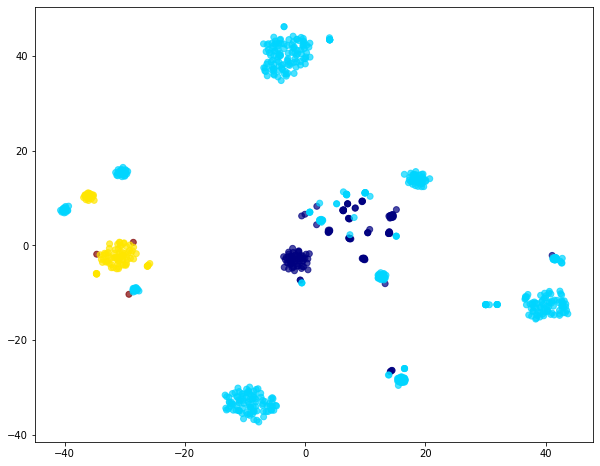

In [99]:
# draw the points
alpha = 0.7
label_map = {l: i for i, l in enumerate(np.unique(node_targets))}
node_colours = [label_map[target] for target in node_targets]

plt.figure(figsize=(10, 8))
plt.scatter(
    node_embeddings_2d[:, 0],
    node_embeddings_2d[:, 1],
    c=node_colours,
    cmap="jet",
    alpha=alpha,
)

<a name='bok'></a>
# 13. Example graph: Bokeh to HTML

This section will not use any graphs/components related to other sections / the source CSV.

Bokeh is a newly introduced Python library, like D3.js, which is used for interactive data visualization targeting web browsers. Bokeh distinguishes itself from other Python visualization libraries such as Matplotlib or Seaborn by providing precise and elegant construction of versatile graphics with high interactivity and high performance in large and streaming data sets. Bokeh can also be used to embed visualizations to Django and Flask.

One potential issue with plotly is the need for an account and API-key, some limitations on how many times a graph can be viewed per day (although I should aspire to have my graphs viewed 1000+ times a day!), and who knows what happens to the graphs if plotly ever goes out of business. While the static images we usually use have limited utility, at least they stick around.

So, today we look at Bokeh which allows you to embed some json data in your HTML, which is made interactive by your browser with more javascript magic.

In [100]:
from bokeh.embed import components
from bokeh.plotting import figure, output_file, show, save
from bokeh.resources import INLINE

# IMPORTANT LINE FOR NOTEBOOK
bokeh.io.output_notebook(INLINE)

In [101]:

p = figure(plot_width=400, plot_height=400)
p.circle([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], size=20, color="navy", alpha=0.5)

show(p)

Output hidden; open in https://colab.research.google.com to view.

### 13.1

One way to use with HTML is to issue components:

In [102]:
plot_script, plot_div = components(p)

And then...

load BokehJS with the following:


In [103]:
'''
<link rel="stylesheet" href="https://cdn.pydata.org/bokeh/release/bokeh-0.12.1.min.css" type="text/css" />
        
<script type="text/javascript" src="https://cdn.pydata.org/bokeh/release/bokeh-0.12.1.min.js"></script>
<script type="text/javascript"> Bokeh.set_log_level("info"); </script>
'''

'\n<link rel="stylesheet" href="https://cdn.pydata.org/bokeh/release/bokeh-0.12.1.min.css" type="text/css" />\n        \n<script type="text/javascript" src="https://cdn.pydata.org/bokeh/release/bokeh-0.12.1.min.js"></script>\n<script type="text/javascript"> Bokeh.set_log_level("info"); </script>\n'

And it should show with:

In [104]:
'''
<div class="bk-root">
    <div class="plotdiv" id="592e3dfb-14ec-4b7f-80af-f6420469c2d3"></div>
</div>
'''

'\n<div class="bk-root">\n    <div class="plotdiv" id="592e3dfb-14ec-4b7f-80af-f6420469c2d3"></div>\n</div>\n'

### 13.2 

Saving as HTML also works.


Bokeh cheatsheet: https://www.pluralsight.com/guides/bokeh-cheat-sheet

In [105]:
output_file("bokeh_test_13.html")
save(p)

#plt.savefig(f"{save_folder}/bokeh_test_13.jpg")

'/content/bokeh_test_13.html'

<a name='gexf'></a>
# 14. NetworkX to GEXF (Gephi)


In [106]:
nx.write_gexf( G , f"{save_folder}/D2V2N.gexf" )

In [107]:
#nx.read_gexf(f"{save_folder}/D2V2N.gexf")

<br>



---



<a name='save'></a>
# 15. Save ipynb as HTML/PDF

Use this section outside of google colab

Can also print -> destination -> save as PDF

In [108]:
pip install nbconvert

Make sure not to have brackets in file name when downloading.

In [109]:
!jupyter nbconvert --to html "INSERTNAME.ipynb"

[NbConvertApp] WARNING | pattern u'INSERTNAME.ipynb' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--no-input
    Exclude input cells and output prompts from converted document. 
    This mode is ideal for generating code-free reports.
--stdout
    Write notebook output to stdout instead of files.
--stdin
    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'
--inplace
    Run nb